
Population counts:


,disease:,no_disease:,total:
exposed:,380,1213,1593
nonexposed:,677,5915,6592
total:,1057,7128,8185




True Population Relative Risk: 2.3227172795307385



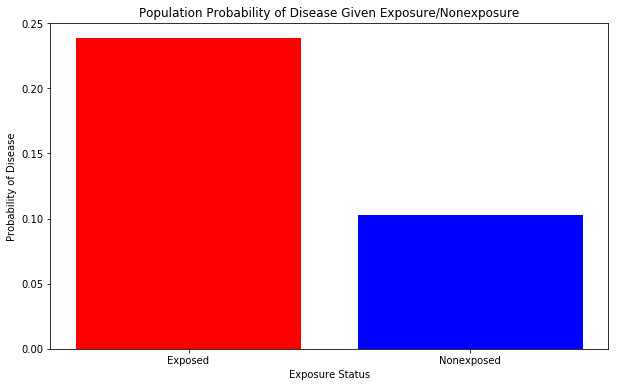

,exposed_disease,exposed_no_disease,nonexposed_disease,nonexposed_no_disease,sample size,relative_risk,log_relative_risk,var_log_relative_risk,ub_ci_log_rr,lb_ci_log_rr,weight
study number:,,,,,,,,,,,
0,17,77,50,384,528,1.569787,0.450940,0.0658811,0.954019,-0.052139,15.1789
1,8,41,13,154,216,2.097331,0.740666,0.175527,1.561826,-0.080495,5.69713
2,38,104,38,465,645,3.542254,1.264763,0.0436013,1.674029,0.855497,22.9351
3,12,81,49,378,520,1.124424,0.117271,0.0906469,0.707380,-0.472839,11.0318
4,12,28,16,166,222,3.412500,1.227445,0.115339,1.893092,0.561798,8.67011
5,25,82,48,425,580,2.302375,0.833941,0.0493734,1.269456,0.398427,20.2538
6,7,41,20,187,255,1.509375,0.411696,0.167193,1.213125,-0.389733,5.98112
7,5,9,11,57,82,2.207792,0.791993,0.204775,1.678933,-0.094947,4.88342
8,5,22,11,112,150,2.070707,0.727890,0.245742,1.699509,-0.243728,4.06931


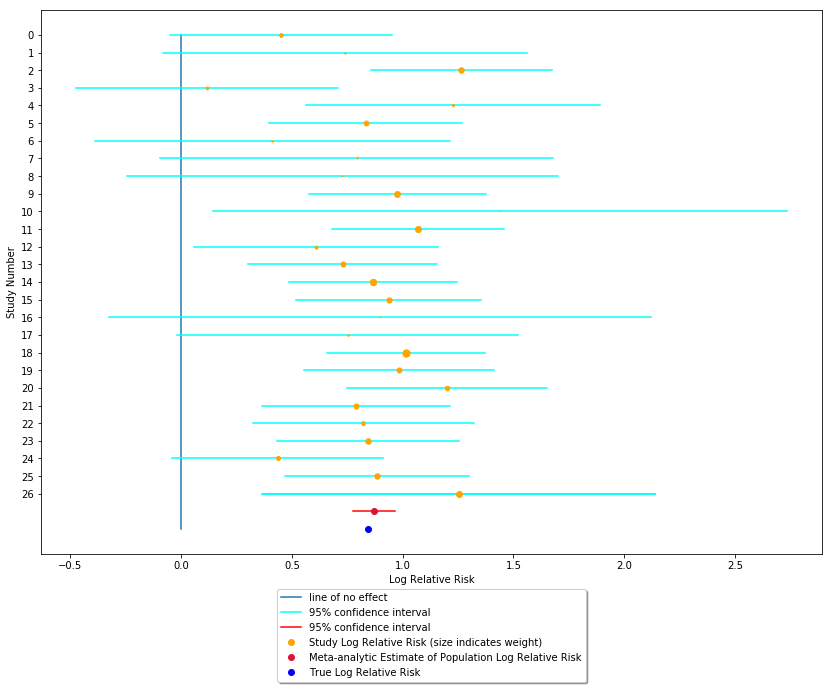

Z statistic of summary effect estimate =  17.752194337099954
p <  0.001


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

# simulating a population of individuals, with a certain proportion exposed to a hazard. The probability of an individual
# having a certain disease status changes conditionally on their exposure status.

population = np.array([])

population_size = np.random.randint(1000,10000)

p_exposed = np.random.uniform(high =0.3)

exposure_danger = np.random.uniform(low =0.2, high = 0.4)

disease_general = np.random.uniform(high = exposure_danger)


for i in np.arange(population_size):
    exposed_or_not = np.random.choice(['exposed','nonexposed'], p = [p_exposed, 1-p_exposed])
    if exposed_or_not == 'exposed':
        population = np.append(population, np.random.choice(['exposed_disease','exposed_no_disease'], 
                                           p=[exposure_danger,1-exposure_danger]))
    if exposed_or_not == 'nonexposed':
        population = np.append(population, np.random.choice(['nonexposed_disease','nonexposed_no_disease'],
                          p=[disease_general,1-disease_general]))
  

# creating counts for exposure and disease status, in the population

population_n = len(population)

nonexposed_no_disease = np.count_nonzero(population == 'nonexposed_no_disease')

nonexposed_disease = np.count_nonzero(population == 'nonexposed_disease')

number_nonexposed = nonexposed_no_disease + nonexposed_disease

exposed_no_disease = np.count_nonzero(population == 'exposed_no_disease')

exposed_disease = np.count_nonzero(population == 'exposed_disease')

number_exposed = exposed_no_disease + exposed_disease

total_disease = nonexposed_disease + exposed_disease

df_pop = pd.DataFrame(index = ['exposed:','nonexposed:', 'total:'], columns = ['disease:','no_disease:', 'total:'])

df_pop.loc['exposed:', 'disease:'] = exposed_disease
df_pop.loc['exposed:', 'no_disease:'] = exposed_no_disease
df_pop.loc['exposed:', 'total:']  = exposed_disease + exposed_no_disease
df_pop.loc['nonexposed:', 'disease:']= nonexposed_disease
df_pop.loc['nonexposed:', 'no_disease:'] = nonexposed_no_disease
df_pop.loc['nonexposed:', 'total:'] = nonexposed_disease + nonexposed_no_disease
df_pop.loc['total:', 'disease:'] = exposed_disease + nonexposed_disease
df_pop.loc['total:', 'no_disease:'] = exposed_no_disease + nonexposed_no_disease 
df_pop.loc['total:', 'total:'] = population_n

# correcting 0 counts so that the relative risk is defined
if df_pop.iloc[0,0] == 0:
    df_pop.iloc[0,0] = 0.5
    
if df_pop.iloc[0,1] == 0:
    df_pop.iloc[0,1] = 0.5

if df_pop.iloc[1,0] == 0:
    df_pop.iloc[1,0] = 0.5
    
if df_pop.iloc[1,1] == 0:
    df_pop.iloc[1,1] = 0.5

print('\nPopulation counts:')
display(df_pop)
print()

# calculating the population effect size

prob_disease_giv_exposure = exposed_disease/(exposed_no_disease + exposed_disease)

prob_disease_giv_nonexposure = nonexposed_disease/(nonexposed_no_disease + nonexposed_disease)

true_relative_risk = prob_disease_giv_exposure/prob_disease_giv_nonexposure

true_log_relative_risk = np.log(true_relative_risk)

    
print()
print('True Population Relative Risk:', true_relative_risk)
print()


plt.figure(figsize = (10,6))
plt.bar(x = ['Exposed', 'Nonexposed'], height = [prob_disease_giv_exposure, prob_disease_giv_nonexposure]
       , color = ['red', 'blue'])
plt.xlabel('Exposure Status')
plt.ylabel('Probability of Disease')
plt.title('Population Probability of Disease Given Exposure/Nonexposure')
plt.show()


# simulating studies for a meta-analysis

no_of_studies = np.random.randint(5,40)

studies = []

for i in np.arange(no_of_studies):
    sample_size = np.random.randint(10,800)
    study = np.random.choice(population, size = sample_size, replace = False)
    studies.append(study)
    
counts = np.array([])


# creating a dataframe for the study counts

df = pd.DataFrame(columns = ['exposed_disease', 'exposed_no_disease',
                                             'nonexposed_disease','nonexposed_no_disease'])

for i in studies:
    temp_exposed_disease = np.count_nonzero(i == 'exposed_disease')
    temp_exposed_no_disease = np.count_nonzero(i == 'exposed_no_disease')
    temp_nonexposed_disease = np.count_nonzero(i == 'nonexposed_disease')
    temp_nonexposed_no_disease = np.count_nonzero(i == 'nonexposed_no_disease')
    study = [temp_exposed_disease,temp_exposed_no_disease,temp_nonexposed_disease,temp_nonexposed_no_disease]
    
    # correcting 0 counts so that the relative risk is defined
    for i in np.arange(len(study)):
        if study[i] == 0:
            study[i] = 0.5
   
    df = df.append(pd.Series(study, index = ['exposed_disease', 'exposed_no_disease',
                                             'nonexposed_disease','nonexposed_no_disease']), ignore_index = True)
  

df['sample size'] = df['exposed_disease'] + df['exposed_no_disease'] + df['nonexposed_disease'] + df['nonexposed_no_disease']
    
df.index.name = 'study number:'



# calculating the relative risk for each study

df['relative_risk'] = (df['exposed_disease']/(df['exposed_no_disease'] + df['exposed_disease']))/(df['nonexposed_disease']/(df['nonexposed_no_disease'] + df['nonexposed_disease']))
df['relative_risk'] = df['relative_risk'].astype('float')
 
# calculating the log relative risk for each study

df['log_relative_risk'] = np.log(df['relative_risk'])

    
# calculating standard error and confidence intervals for the log relative risk

SE_log_relative_risk = np.array([])
var_log_relative_risk = np.array([])



n1 = df['exposed_disease'] + df['exposed_no_disease']
n2 = df['nonexposed_disease'] + df['nonexposed_no_disease']
var_log_relative_risk = 1/df['exposed_disease'] - 1/n1 + 1/df['nonexposed_disease'] - 1/n2                      
se_log_relative_risk = np.sqrt(var_log_relative_risk.astype('float'))


df['var_log_relative_risk'] = var_log_relative_risk 
df['ub_ci_log_rr'] = df['log_relative_risk'] + 1.96 * se_log_relative_risk
df['lb_ci_log_rr'] = df['log_relative_risk'] - 1.96 * se_log_relative_risk
df['weight'] = 1/var_log_relative_risk

    
display(df)


# creating a forest plot of relative risk for each study

y = []
zeros = []
for i in np.arange(len(df.index)+2):
    y.append(i)
    zeros.append(0)

study_list = list(df.index)


plt.figure(figsize = (14,10))   
plt.plot(zeros,y, label = 'line of no effect')
plt.xlabel('Log Relative Risk')
plt.ylabel('Study Number')

plt.yticks(study_list)
plt.gca().invert_yaxis()


for i in np.arange(len(df)):
    xs = np.linspace(df['lb_ci_log_rr'].iloc[i],df['ub_ci_log_rr'].iloc[i])
    ys = []
    for x in xs:
        ys.append(study_list[i])
    plt.plot(xs, ys, color = 'cyan')
 
    
plt.plot(xs, ys, color = 'cyan', label = '95% confidence interval')
    

stndrd_weights = df['weight']/np.sum(df['weight']) * 100
    

for i in np.arange(len(df)):
    plt.plot(df['log_relative_risk'].iloc[i], i, 'o', color = 'orange', markersize = stndrd_weights[i])
    
    
# calculating the fixed effect meta-analysis statistics

effect_sizes = df['log_relative_risk']
weights = df['weight']
sum_of_weights = np.sum(weights)

effect_size_times_weight = effect_sizes * weights

sum_effect_size_times_weight = np.sum(effect_size_times_weight)

weighted_mean = sum_effect_size_times_weight/sum_of_weights
var_weighted_mean = 1/sum_of_weights
se_weighted_mean = np.sqrt(var_weighted_mean)

# calculating and plotting the confidence intervals of the summary estimate
ub_ci_wm = weighted_mean + 1.96 * se_weighted_mean
lb_ci_wm = weighted_mean - 1.96 * se_weighted_mean    

ci_line = np.linspace(lb_ci_wm,ub_ci_wm)

ci_ys = []
for i in np.arange(len(ci_line)):
    ci_ys.append(max(study_list)+1)
    
plt.plot(ci_line,ci_ys, color = 'red', label = '95% confidence interval')
plt.plot(df['log_relative_risk'][len(df['log_relative_risk'])-1], len(df['log_relative_risk'])-1, 'o', color = 'orange', label = 'Study Log Relative Risk (size indicates weight)')
plt.plot(weighted_mean,max(study_list)+1, 'o', color = 'crimson', label = 'Meta-analytic Estimate of Population Log Relative Risk')

plt.plot(true_log_relative_risk,max(df.index)+2, 'o', color = 'blue', label = 'True Log Relative Risk')

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
    
ax = plt.subplot()
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=1)
plt.show()

    
# calculating the significance of the summary effect size
z = weighted_mean/se_weighted_mean
p = 2 * (1 - scipy.stats.norm.cdf(abs(z)))

if p == 0:
    p = 0.001
    print('Z statistic of summary effect estimate = ', z)
    print('p < ', p)
else:
    print('Z statistic of summary effect estimate = ', z)
    print('p = ', p)
